## A simple play 

We are going to generate a simple play like the famous ahorcado. 

To do that, we do several taks before:
    
    - Web scrapping: we want to obtain the list of animals from another web site. 
    - Web driver: to check with a spanish dictionary that the word that you are going to give is real. 
    - Web driver: download an image from this animal from google. 
    
The difference here is that we want to learn the aniamls en english, so you have to translate it at end. 

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

import random 
from collections import Counter
import unidecode

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
import chromedriver_binary
from webdriver_manager.chrome import ChromeDriverManager

import io 
from PIL import Image

### Web scrapping

In [8]:
url = 'https://www.aprendeinglessila.com/2013/05/animales-espanol-ingles-pronunciacion/'
r = requests.get(url) # get the web site 

if r.status_code == 200:
    htmltext = r.text # get the html text
    # encoding
    r.encoding='UTF-8' 
    
    soup = BeautifulSoup(r.text, "html.parser")
    
    link = soup.find_all("td") # find the list of animals 
    
    listanimals = []
    
    for names in soup.find_all("td"):
        listanimals.append(names.string)
        
    # generate the dataframe with the diferents columns 
    
    Esp = listanimals[3::3] # animals in spanish
    Eng = listanimals[4::3] # animals in english 
    spk = listanimals[5::3] # speaking
    
    animals = pd.DataFrame([Esp, Eng, spk]).T
    animals.columns = ['Esp', 'Eng', 'spk']

else:
    print(r.status_code)

### My word

We are going to choose an animal from the list. 

In [9]:
# select a animal from the spanish list
myword0 = random.choice(animals.Esp)
myword = myword0.lower()                    # lower letter
myword = unidecode.unidecode(myword)       # without accent (normalize)

# make a dictionary 
d = {index:letter for index, letter in enumerate(myword)}

# make the baseline 
ahorcado = ['_']*len(list(myword))

### Your word

You have to say a word with the same number of letter that the animal that we are looking for. Also, the word have to be real. 

In [10]:
print('Your word need to have:', len(myword), 'letters')

Your word need to have: 4 letters


In [11]:
yourword = 'cafe'

In [12]:
# the first step is check the lenght 

if len(myword) == len(yourword):
    start = 1
    #print('All rigth!')
else:
    start = 0
    #print('Try another word')
    
# the second step is check that your word is real 

# old selenium
#driver = webdriver.Chrome(executable_path ='C:\Program Files\Google\Chrome\Application\chrome.exe') # create the instace 
#driver.get("https://dle.rae.es/") #navigate to a page 

if start == 1:
    # iedra dictionary
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get("https://iedra.es/")
    
    elem = driver.find_element_by_name("q")
    elem.send_keys(yourword)
    elem.send_keys(Keys.ENTER) # write the word and press enter 
    
    # check if the word exist: if exist = 1 , if not = 0
    try:
        driver.find_element_by_id("suggestion")
    except:
        print('The word exist')
        exist = 1
        pass
    
    # check if the word no exist
    
    try:
        driver.find_element_by_id('ul_results')
    except:
        print('The word no exist')
        exist = 0
        pass
    
    driver.quit()
else:
    print('Check the length of the word...')
    
if (exist == 1):
    print('All rigth!')
else:
    print('Check your word...')



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\eamoros.ELNR\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
<ipython-input-12-ac75b9ee043e>:21: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  elem = driver.find_element_by_name("q")


The word exist


<ipython-input-12-ac75b9ee043e>:27: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id("suggestion")
<ipython-input-12-ac75b9ee043e>:36: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('ul_results')


### Let's play!

If everthing is correct, we are ready to play!

In [14]:
yourword = unidecode.unidecode(yourword)
yourword = yourword.lower()


# traditional 
for i in list(yourword):
    if (i in d.values()) == True:
        positions = [key for key, value in d.items() if value == i]
        for j in positions:
            ahorcado[j] = i
            
print(ahorcado)
print('\nAnother word?')

## Second opportunity 

Do you want to try another time before the final?

In [22]:
yourword2 = 'vaya'

In [23]:
if len(myword) == len(yourword2):
    start = 1
    #print('All rigth!')
else:
    start = 0
    #print('Try another word')
    
# the second step is check that your word is real 

# old selenium
#driver = webdriver.Chrome(executable_path ='C:\Program Files\Google\Chrome\Application\chrome.exe') # create the instace 
#driver.get("https://dle.rae.es/") #navigate to a page 

if start == 1:
    # iedra dictionary
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get("https://iedra.es/")
    
    elem = driver.find_element_by_name("q")
    elem.send_keys(yourword2)
    elem.send_keys(Keys.ENTER) # write the word and press enter 
    
    # check if the word exist: if exist = 1 , if not = 0
    try:
        driver.find_element_by_id("suggestion")
    except:
        print('The word exist')
        exist = 1
        pass
    
    # check if the word no exist
    
    try:
        driver.find_element_by_id('ul_results')
    except:
        print('The word no exist')
        exist = 0
        pass
    
    driver.quit()
else:
    print('Check the length of the word...')
    
if (exist == 1):
    print('All rigth!')
else:
    print('Check your word...')



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\eamoros.ELNR\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
<ipython-input-23-61c8303d77b1>:19: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  elem = driver.find_element_by_name("q")
<ipython-input-23-61c8303d77b1>:25: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id("suggestion")
<ipython-input-23-61c8303d77b1>:34: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id('ul_results')


The word exist


In [25]:
yourword2 = unidecode.unidecode(yourword2)
yourword2 = yourword2.lower()


# traditional 
for i in list(yourword2):
    if (i in d.values()) == True:
        positions = [key for key, value in d.items() if value == i]
        for j in positions:
            ahorcado[j] = i
            
print(ahorcado)
print('\nAre you ready to learn english?')

['_', '_', 'e', 'y']

Are you ready to learn english?


## Final step

Now you have to write the animal that you think that it is, but in english! 

After that, we are going to show you the utterance of the word and an image of this!

In [26]:
print('The animal that you think is...')

The animal that you think is...


In [27]:
youranimal = 'buey'

In [28]:
if youranimal == myword:
    print('Yes! Now you have to translate it to english...')
else:
    print('You have to start another time...')

Yes! Now you have to translate it to english...


In [34]:
youranimal_english = 'Ox'

In [47]:
if animals[animals.Esp == myword0]['Eng'].tolist()[0] == youranimal_english:
    print('Great job!')
    print('\nNow we are going to see the animal')
else:
    print('You have to start another time...')

Great job!

Now we are going to see the animal


## See it

Now we are going to see a picture of the animal. To do that, we are going to looking foward at google and download the image. 

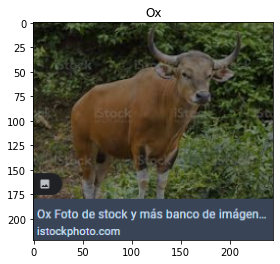

In [87]:
# lets look foward the animal 

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://google.es/")
elem = driver.find_element_by_id("L2AGLb")
elem.send_keys(Keys.ENTER)
elem = driver.find_element_by_name("q")
elem.send_keys(animals[animals.Esp == myword0]['Eng'].tolist()[0])
elem.send_keys(Keys.ENTER)
driver.find_element_by_xpath("//a[@data-hveid = 'CAIQAw']").click()
img = driver.find_element_by_xpath("//div[@data-hveid = 'CAEQjgE']").screenshot_as_png

driver.quit()

# now we have our image with bytes

image = Image.open(io.BytesIO(img))
#image.show()
plt.imshow(image)
plt.title(animals[animals.Esp == myword0]['Eng'].tolist()[0])
plt.show()